# Mathematics of Machine Learning

## Programming tasks: Examples for Logistic Regression

### (0) Preparation

Import required modules

In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt 

Generate the training data

In [2]:
# Size of the dataset
m = 50
x = np.random.uniform(low=-3, high=3, size=(2, m))
print(x)

[[ 1.42158982  2.47023289  2.36409882  2.33701802 -0.51797654  2.71148634
   1.65265208  2.03758027 -0.32611682  2.69313186 -0.33228058 -1.85108495
   2.33040175  1.76336435 -2.99013626  1.06438767  1.75816571 -0.89799431
  -1.92812718 -2.06458043  2.57457454 -2.58718819  0.35527786 -2.45985864
  -1.15717438  2.54981465  1.01948699 -2.23919394  0.21205097  1.53604616
   2.64808238 -0.87966718  2.24949414 -2.83330936 -1.82902611  1.12921939
   0.46583975 -2.05193266  2.47257792  0.9952689  -0.64341167  2.98212759
  -2.22097008 -1.67549543 -1.51918613 -0.47039797 -1.32610576 -1.77046563
   0.6644625  -0.76779544]
 [-0.02399683 -1.37894032  0.45268557 -2.25262469  2.49355563  1.3150019
  -2.09549189  2.52265214  2.07837779  1.33936525  1.52567804 -0.10629499
   2.64814583  2.73858215 -1.53786809 -2.5316929  -0.39227889 -0.07642325
   1.86140055 -0.61012871 -0.90194732  2.15869974 -1.96595516  1.39673637
   2.61498118 -1.18058766 -1.70590633 -0.05827634 -2.38603104 -2.92309633
  -2.5393950

In [3]:
# true parameters
w_true = np.array([[1], [2]])
print(w_true)

[[1]
 [2]]


In [4]:
# Probabilities for label +1 according to the Bernoulli model with h_{w_true,0}
p = 1/(1 + np.exp(-(np.dot(w_true.T, x))))
print(p)

[[0.79796055 0.42857984 0.96336647 0.10263982 0.98867256 0.99523409
  0.07321429 0.99916136 0.97876496 0.99537601 0.93814291 0.11267788
  0.99951297 0.99928358 0.00231536 0.01800391 0.72583805 0.25906368
  0.85749936 0.03609502 0.68366795 0.84943944 0.02720871 0.58263848
  0.98325532 0.54702048 0.08375978 0.08661008 0.01035362 0.01325357
  0.08086086 0.27029054 0.03928498 0.02152809 0.00405931 0.01227906
  0.01744812 0.09406138 0.99911437 0.75564515 0.04559849 0.9992716
  0.09678336 0.13522126 0.98400241 0.25364194 0.00275302 0.00177623
  0.99622079 0.99182025]]


In [5]:
# Dice out the random markers according to the probabilities p
y = 2*(np.random.uniform(low=0, high=1, size=(1, m)) <= p) - 1
print(y)
# y = 2*(rand(1,m) <= p)-1; 

[[ 1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1
   1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1
   1  1]]


### (1) Graphical visualization of the training data

First plot the true hyperplane for x in [-3,3].

Then enter the classified points

In [6]:
# Points with mark 1
inds = [i for (i, val) in enumerate(y[0]) if val == 1]
print(inds)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 17, 18, 20, 21, 24, 27, 38, 39, 41, 42, 43, 44, 48, 49]


In [7]:
# Points with mark -1
indm = [i for (i, val) in enumerate(y[0]) if val == -1]
print(indm)

[3, 11, 14, 15, 16, 19, 22, 23, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 45, 46, 47]


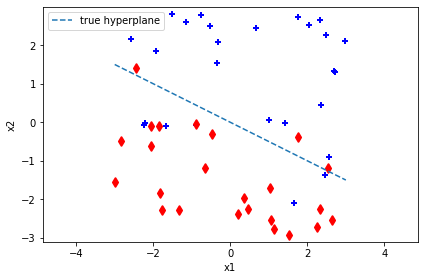

In [8]:
# First plot the true hyperplane for x in [-3,3].
fig, ax = plt.subplots()
ax.plot([-3,3], -w_true[0]/w_true[1]*[-3,3], "--", label="true hyperplane")
ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="d", linewidths = 2)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
ax.set(xlim=(-3, 3), ylim=(-3, 3))
ax.axis('equal')
fig.tight_layout()

### (2) Logistic regression

Empirical risk function

In [9]:
def RS(w): return np.mean(np.log(1 + np.exp(- np.multiply(y, (np.dot(w.T, x))))), axis=1)
# RS = @(w) mean( log(1 + exp(- y .* (w' * x))),2);

NOTES:
<br> 1) w is a column vector with two rows OR a matrix with two rows and multiple columns for multiple weight vectors w.
<br> 2) mean(. ,2) calculates the mean value per column
<br> 3) The function should be evaluable for multiple w vectors, so that the result contains as row vector the empirical risk values of the individual w vectors.

Plot this function

In [10]:
# Discretization of the w-values per axis
ws = np.array([[i] for i in np.arange(-5, 10 + 0.01, 0.01)])

In [11]:
# Create discretization grid
WW1, WW2 = np.meshgrid(ws, ws)
WW1_ravel = np.ravel(WW1, order='F')
WW2_ravel = np.ravel(WW2, order='F')
print(WW1_ravel)
print(WW2_ravel)
print(len(WW2_ravel))

[-5. -5. -5. ... 10. 10. 10.]
[-5.   -4.99 -4.98 ...  9.98  9.99 10.  ]
2253001


In [12]:
# Evaluate RS at the grid points
RS_Ws = RS(np.concatenate((WW1_ravel[:, None], WW2_ravel[:, None]), axis=1).T)
print(np.concatenate((WW1_ravel[:, None], WW2_ravel[:, None]), axis=1).T)
print(RS_Ws)

[[-5.   -5.   -5.   ... 10.   10.   10.  ]
 [-5.   -4.99 -4.98 ...  9.98  9.99 10.  ]]
[9.49843559 9.4862544  9.47408343 ... 2.25061302 2.24937729 2.24814799]


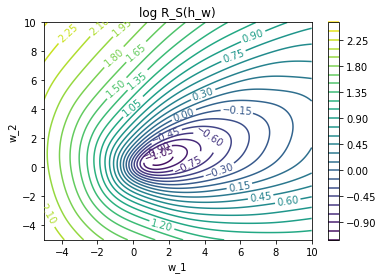

In [13]:
# Generate graphic (contour plot):
fig, ax = plt.subplots()

CS = ax.contour(WW1, WW2, np.reshape(np.log(RS_Ws), (len(ws), len(ws))), 25)
ax.clabel(CS, inline=True, fontsize=10)

ax.set_title('log R_S(h_w)')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')

fig.colorbar(CS)
plt.show()

In [14]:
# Numerical calculation of the ERM parameters
# result = opt.fmin_tnc(RS,  np.zeros((2, 1)))
# xopt, fopt, iter, funcalls, warnflag = fmin(T,0, full_output=True, disp=False)
w, RS_min, iter, funcalls, warnflag = opt.fmin(RS,  np.zeros((2, 1)), maxiter=1000, full_output=True, disp=False)

print(w)
print(RS_min)
print(iter)
print(funcalls)
print(warnflag)

[0.56024578 1.4718318 ]
0.3227268086191447
61
118
0


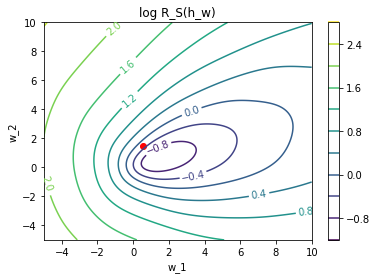

In [15]:
# Plot the learned parameters

fig, ax = plt.subplots()

CS = ax.contour(WW1, WW2, np.reshape(np.log(RS_Ws), (len(ws), len(ws))), 10)
ax.clabel(CS, inline=True, fontsize=10)

# learned
ax.scatter(w[0], w[1], c="r")
# true
# ax.scatter(w_true[0], w_true[1], marker="+")

ax.set_title('log R_S(h_w)')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')

fig.colorbar(CS)
plt.show()

### Hypothesen und Daten zeichnen

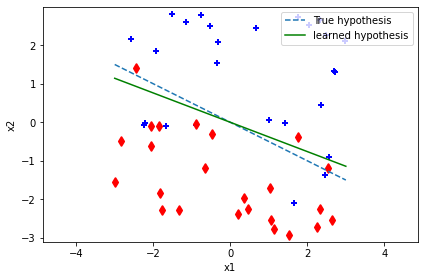

In [16]:
fig, ax = plt.subplots()
ax.plot([-3,3], -w_true[0]/w_true[1]*[-3,3], "--", label="True hypothesis")
ax.plot([-3,3], -w[0]/w[1]*np.array([-3,3]), c="g", label="learned hypothesis")
ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="d", linewidths = 2)
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
ax.set(xlim=(-3, 3), ylim=(-3, 3))
ax.axis('equal')
fig.tight_layout()

### (3) Logistic regression in Pytorch

In [17]:
class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)
     def forward(self, x):
         outputs = torch.sigmoid(self.linear(x))
         return outputs

In [18]:
x = torch.from_numpy(x.T.astype(np.float32))
print(x.size())
y = torch.from_numpy(y.astype(np.float32))

torch.Size([50, 2])


In [19]:
# assigning some hyper-parameters:
epochs = 100 # Indicates the number of passes through the entire training dataset the network has completed
input_dim = 2
output_dim = 1 # Single output 
# learning_rate = 0.01

model = LogisticRegression(input_dim, output_dim)

In [20]:
# Binary Cross Entropy Loss
criterion = torch.nn.BCELoss() 

In [21]:
# LBFGS: Implements L-BFGS algorithm, heavily inspired by minFunc
optimizer = torch.optim.LBFGS(model.parameters())

In [22]:
for epoch in range(epochs):
    def closure():
        optimizer.zero_grad() # Setting our stored gradients equal to zero
        outputs = model(x)
        loss = criterion(torch.squeeze(outputs), y[0]) 
        loss.backward() 
        print(list(model.parameters()))
        print(loss.item())
        return loss
    
    optimizer.step(closure) # Updates weights and biases with the optimizer
# print(loss.item())
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.5530,  0.5468]], requires_grad=True), Parameter containing:
tensor([-0.4071], requires_grad=True)]
0.15711481869220734
[Parameter containing:
tensor([[-0.2352,  1.0450]], requires_grad=True), Parameter containing:
tensor([-0.5911], requires_grad=True)]
-0.5105491876602173
[Parameter containing:
tensor([[0.2921, 2.9013]], requires_grad=True), Parameter containing:
tensor([-1.8028], requires_grad=True)]
-2.2655744552612305
[Parameter containing:
tensor([[ 0.1536, 11.3335]], requires_grad=True), Parameter containing:
tensor([-7.6889], requires_grad=True)]
-9.027708053588867
[Parameter containing:
tensor([[ 3.2814, 12.7374]], requires_grad=True), Parameter containing:
tensor([-11.0520], requires_grad=True)]
-11.457549095153809
[Parameter containing:
tensor([[ 6.9769, 13.0293]], requires_grad=True), Parameter containing:
tensor([-14.2232], requires_grad=True)]
-12.877741813659668
[Parameter containing:
tensor([[ 6.4958, 14.0219]], requires_grad=True), Para

[Parameter containing:
tensor([[351.0186, 543.7794]], requires_grad=True), Parameter containing:
tensor([-307.1577], requires_grad=True)]
-28.25304412841797
[Parameter containing:
tensor([[351.0186, 543.7794]], requires_grad=True), Parameter containing:
tensor([-307.1577], requires_grad=True)]
-28.25304412841797
[Parameter containing:
tensor([[351.0186, 543.7794]], requires_grad=True), Parameter containing:
tensor([-307.1577], requires_grad=True)]
-28.25304412841797
[Parameter containing:
tensor([[351.0186, 543.7794]], requires_grad=True), Parameter containing:
tensor([-307.1577], requires_grad=True)]
-28.25304412841797
[Parameter containing:
tensor([[351.0186, 543.7794]], requires_grad=True), Parameter containing:
tensor([-307.1577], requires_grad=True)]
-28.25304412841797
[Parameter containing:
tensor([[351.0186, 543.7794]], requires_grad=True), Parameter containing:
tensor([-307.1577], requires_grad=True)]
-28.25304412841797
[Parameter containing:
tensor([[351.0186, 543.7794]], requ

In [23]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(epochs):
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(x)
    loss = criterion(torch.squeeze(outputs), y[0]) 
    loss.backward() 
    optimizer.step() # Updates weights and biases with the optimizer
    
print(loss.item())
print(list(model.parameters()))

-28.25304412841797
[Parameter containing:
tensor([[351.0186, 543.7794]], requires_grad=True), Parameter containing:
tensor([-307.1577], requires_grad=True)]
